In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
house_data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [ ]:
house_data.head(10)

In [ ]:
house_data.shape

In [ ]:
house_data.describe()

In [ ]:
house_data.columns

In [ ]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
sns.distplot(house_data['SalePrice'])

In [ ]:
var = 'TotalBsmtSF'
data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
var = 'GrLivArea'

data = pd.concat([house_data['SalePrice'], house_data[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = house_data[['SalePrice', var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

In [ ]:
corrmat = house_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Most correlated with 'SalePrice':
1. OverallQual
2. GrLivArea
3. GarageCars
4. GarageArea
5. TotalBmstSF

In [ ]:
import seaborn as sns
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show();

In [ ]:
total = house_data.isnull().sum().sort_values(ascending=False)
percent = (house_data.isnull().sum()/house_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [ ]:
house_data.dtypes.value_counts()

In [ ]:
house_data.dtypes

In [ ]:
(house_data.columns[house_data.dtypes != 'object'])








# Linear Regression 


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:


numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))



# Lasso Method

In [ ]:
from sklearn import linear_model
from sklearn.linear_model import Lasso

In [ ]:
from sklearn.linear_model import Ridge
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Lasso())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

# Changing Features


In [ ]:
house_data.dtypes['OverallQual']
house_data.dtypes['GrLivArea']
house_data.dtypes['GarageCars']
house_data.dtypes['GarageArea']
house_data.dtypes['TotalBsmtSF']
house_data.dtypes['YearBuilt']



In [ ]:
selected_features = {'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'YearBuilt'}

In [ ]:
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)
X_train = X_train[list(selected_features)]
X_test = X_test[list(selected_features)]
reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

# ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNet
numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression',  ElasticNet())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)

reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

# Polynomial Features

In [ ]:
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:

numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(2))])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


reg = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regression', Ridge())])

X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2, random_state=51)
X_train = X_train[list(selected_features)]
X_test = X_test[list(selected_features)]
reg.fit(X_train, y_train)
print("model score: %.3f" % reg.score(X_test, y_test))
print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

# Cross-validation


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
X = house_data[house_data.columns.drop('SalePrice')]
y = house_data['SalePrice']
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

## LinearRegression

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

    categorical_features = house_data.columns[house_data.dtypes == 'object']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
            ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', LinearRegression())])

    X_train = X_train[list(selected_features)]
    X_test = X_test[list(selected_features)]
    reg.fit(X_train, y_train)
    print("model score: %.3f" % reg.score(X_test, y_test))
    print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
    print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test))) 


## Ridge

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

    categorical_features = house_data.columns[house_data.dtypes == 'object']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
            ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', Ridge())])

    X_train = X_train[list(selected_features)]
    X_test = X_test[list(selected_features)]
    reg.fit(X_train, y_train)
    print("model score: %.3f" % reg.score(X_test, y_test))
    print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
    print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

## Lasso

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

    categorical_features = house_data.columns[house_data.dtypes == 'object']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
            ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', Lasso())])

    X_train = X_train[list(selected_features)]
    X_test = X_test[list(selected_features)]
    reg.fit(X_train, y_train)
    print("model score: %.3f" % reg.score(X_test, y_test))
    print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
    print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

## ElasticNet

In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

    categorical_features = house_data.columns[house_data.dtypes == 'object']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
            ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', ElasticNet())])

    X_train = X_train[list(selected_features)]
    X_test = X_test[list(selected_features)]
    reg.fit(X_train, y_train)
    print("model score: %.3f" % reg.score(X_test, y_test))
    print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
    print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

## PolynomialFeatures



In [ ]:
for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')
   

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

    categorical_features = house_data.columns[house_data.dtypes == 'object']
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
            ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


    reg = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', Ridge())])

    X_train, X_test, y_train, y_test = train_test_split(house_data[house_data.columns.drop('SalePrice')], house_data['SalePrice'], test_size=0.2)
    X_train = X_train[list(selected_features)]
    X_test = X_test[list(selected_features)]
    reg.fit(X_train, y_train)
    print("model score: %.3f" % reg.score(X_test, y_test))
    print("model mae: %.3f" % mean_absolute_error(y_test, reg.predict(X_test)))
    print("model mse: %.3f" % mean_squared_error(y_test, reg.predict(X_test)))

# Plot 

In [ ]:
names = ["Ridge", "Lasso", "Linear", "ElasticNet", "PolyFeatures"]

In [ ]:
# preprocessing stuff

numeric_features = house_data.columns[house_data.dtypes != 'object'].drop('SalePrice')


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()), 
    ('poly', PolynomialFeatures(2))])

numeric_poly_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()), 
        ('poly', PolynomialFeatures(2))])

categorical_features = house_data.columns[house_data.dtypes == 'object']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])

poly_preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_poly_transformer, list(set(numeric_features).intersection(selected_features))),
        ('cat', categorical_transformer, list(set(categorical_features).intersection(selected_features)))])


In [ ]:
ridge = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', Ridge())])

lasso = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', Lasso())])

elasticnet = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', ElasticNet())])

linear = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regression', LinearRegression())])

poly = Pipeline(steps=[('preprocessor', poly_preprocessor),
                          ('regression', Lasso())])

models = [ridge, lasso, linear, elasticnet, poly]

In [ ]:
def rmse_log(x, y):
    return np.sqrt(np.mean((np.log(x)-np.log(y))**2))

In [ ]:
import subprocess
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import KFold
X = house_data[house_data.columns.drop('SalePrice')]
y = house_data['SalePrice']
kf = KFold(n_splits=5)



In [72]:
cv_metrics = []
for name, model in zip(names, models):
    fold_metrics = []
    for train_ind, test_ind in kf.split(X):
        X_train, X_test = X.iloc[train_ind], X.iloc[test_ind]
        y_train, y_test = y[train_ind], y[test_ind]
        model.fit(X_train, y_train)
        fold_metrics.append(rmse_log(y_test, model.predict(X_test)))
        model.fit(X, y)
        X_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
        X_test['SalePrice'] = model.predict(X_test)
        X_test[['Id', 'SalePrice']].to_csv(f'submission_{name}.csv', index=False)
        #subprocess.call(f"kaggle competitions submit -c house-prices-advanced-regression-techniques -f ./submission_{name}.csv -m {name}".split(' '))
    cv_metrics.append(np.mean(fold_metrics))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


In [73]:
public_score = [0.17808, 0.17809, 0.17809, 0.20570, 0.17809]

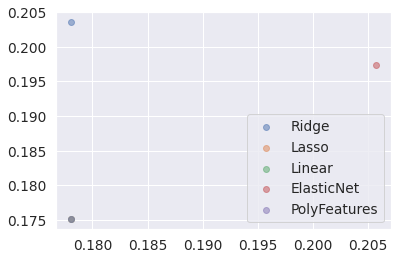

In [85]:
from matplotlib import pyplot as plt
for name, pub, cv in zip(names, public_score, cv_metrics):
    plt.scatter(pub, cv, label=name, alpha=0.5)
    plt.legend()
plt.show()